In [1]:
###Libraries


#importing lib and packages

import pandas as pd
pd.options.display.max_rows = 1000 # for showing truncated result

import matplotlib.pyplot as plt
#to avoid writing plt.show() again and again
%matplotlib inline 

import numpy as np
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

# Required Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Importing Required Libraries

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt

import scipy.stats as stats
from sklearn.model_selection import train_test_split
##from feature_engine.discretisation import EqualWidthDiscretiser
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor

##import warnings





import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mutual_info_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction import DictVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

#import xgboost as xgb

from IPython.display import display

from tqdm.auto import tqdm

In [10]:
### establishing a dataframe

# Replace 'your_dataset.csv' with your actual file path
df1 = pd.read_csv('C:/Users/drego/Desktop/Despair/Datasets/Newest/10_8000_195_(267)_5.88/Speed_Dating_Data.csv', encoding='ISO-8859-1')


In [ ]:
#===================
#*DATA Pre-Processing*
#===================

In [ ]:
#Attribute Information
#* gender: Gender of self
#* age: Age of self
#* age_o: Age of partner
#* d_age: Difference in age
#* race: Race of self
#* race_o: Race of partner
#* samerace: Whether the two persons have the same race or not.
#* importance_same_race: How important is it that partner is of same race?
#* importance_same_religion: How important is it that partner has same religion?
#* field: Field of study
#* pref_o_attractive: How important does partner rate attractiveness
#* pref_o_sinsere: How important does partner rate sincerity
#* pref_o_intelligence: How important does partner rate intelligence
#* pref_o_funny: How important does partner rate being funny
#* pref_o_ambitious: How important does partner rate ambition
#* pref_o_shared_interests: How important does partner rate having shared interests
#* attractive_o: Rating by partner (about me) at night of event on attractiveness
#* sincere_o: Rating by partner (about me) at night of event on sincerity
#* intelligence_o: Rating by partner (about me) at night of event on intelligence
#* funny_o: Rating by partner (about me) at night of event on being funny
#* ambitous_o: Rating by partner (about me) at night of event on being ambitious
#* shared_interests_o: Rating by partner (about me) at night of event on shared interest
#* attractive_important: What do you look for in a partner - attractiveness
#* sincere_important: What do you look for in a partner - sincerity
#* intellicence_important: What do you look for in a partner - intelligence
#* funny_important: What do you look for in a partner - being funny
#* ambtition_important: What do you look for in a partner - ambition
#* shared_interests_important: What do you look for in a partner - shared interests
#* attractive: Rate yourself - attractiveness
#* sincere: Rate yourself - sincerity
#* intelligence: Rate yourself - intelligence
#* funny: Rate yourself - being funny
#* ambition: Rate yourself - ambition
#* attractive_partner: Rate your partner - attractiveness
#* sincere_partner: Rate your partner - sincerity
#* intelligence_partner: Rate your partner - intelligence
#* funny_partner: Rate your partner - being funny
#* ambition_partner: Rate your partner - ambition
#* shared_interests_partner: Rate your partner - shared interests
#* sports: Your own interests [1-10]
#* tvsports
#* exercise
#* dining
#* museums
#* art
#* hiking
#* gaming
#* clubbing
#* reading
#* tv
#* theater
#* movies
#* concerts
#* music
#* shopping
#* yoga
#* interests_correlate: Correlation between participant’s and partner’s ratings of interests.
#* expected_happy_with_sd_people: How happy do you expect to be with the people you meet during the speed-dating event?
#* expected_num_interested_in_me: Out of the 20 people you will meet, how many do you expect will be interested in dating you?
#* expected_num_matches: How many matches do you expect to get?
#* like: Did you like your partner?
#* guess_prob_liked: How likely do you think it is that your partner likes you?
#* met: Have you met your partner before?
#* decision: Decision at night of event.
#* decision_o: Decision of partner at night of event.
#* match: Match (yes/no)
    
#All the features that start with d_ (except d_age) are categorical features that contain the interval the participant belongs to according to that particular score. For example, the numerical feature importance_same_religion contains a numerical score between 1 and 10; 3 or 4 groups are created according to those scores and the categorical feature d_importance_same_religion contains the group for any given user.

#Due to the high amount of features, these categorical features have been removed from the get go in order to simplify the dataframe.

#We're also removing decision and decision_o, because match is the result of a simple AND operation between these 2 features.


In [28]:
original_columns = ['has_null', 'wave', 'gender', 'age', 'age_o', 'd_age', 'd_d_age', 'race',
 'race_o', 'samerace', 'importance_same_race', 'importance_same_religion', 'd_importance_same_race',
 'd_importance_same_religion', 'field','income', 'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence',
 'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 'd_pref_o_attractive', 'd_pref_o_sincere',
 'd_pref_o_intelligence', 'd_pref_o_funny', 'd_pref_o_ambitious', 'd_pref_o_shared_interests', 'attractive_o',
 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 'd_attractive_o', 'd_sinsere_o',
 'd_intelligence_o', 'd_funny_o', 'd_ambitous_o', 'd_shared_interests_o', 'attractive_important', 'sincere_important',
 'intellicence_important', 'funny_important', 'ambtition_important', 'shared_interests_important',
 'd_attractive_important', 'd_sincere_important', 'd_intellicence_important', 'd_funny_important',
 'd_ambtition_important', 'd_shared_interests_important', 'attractive', 'sincere', 'intelligence',
 'funny', 'ambition', 'd_attractive', 'd_sincere', 'd_intelligence', 'd_funny', 'd_ambition',
 'attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner',
 'ambition_partner', 'shared_interests_partner', 'd_attractive_partner', 'd_sincere_partner',
 'd_intelligence_partner', 'd_funny_partner', 'd_ambition_partner', 'd_shared_interests_partner',
 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 
 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'd_sports', 'd_tvsports', 'd_exercise', 'd_dining',
 'd_museums', 'd_art', 'd_hiking', 'd_gaming', 'd_clubbing', 'd_reading', 'd_tv', 'd_theater', 'd_movies', 'd_concerts',
 'd_music', 'd_shopping', 'd_yoga', 'interests_correlate', 'd_interests_correlate', 'expected_happy_with_sd_people', 
 #'expected_num_interested_in_me', 
                    'expected_num_matches', 'd_expected_happy_with_sd_people', 'd_expected_num_interested_in_me', 
 'd_expected_num_matches', 'like', 'guess_prob_liked', 'd_like', 'd_guess_prob_liked', 'met', 'decision', 'decision_o', 'match']

kept_columns = ['has_null', 'wave', 'gender', 'age', 'age_o', 'd_age', 'race', 'race_o', 'samerace', 
'importance_same_race', 'importance_same_religion', 'field', 'income', 'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 
'pref_o_funny', 'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 
'ambitous_o', 'shared_interests_o', 'attractive_important', 'sincere_important', 'intellicence_important', 'funny_important', 
'ambtition_important', 'shared_interests_important', 'attractive', 'sincere', 'intelligence', 'funny', 'ambition', 
'attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner', 'shared_interests_partner', 
'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater', 
'movies', 'concerts', 'music', 'shopping', 'yoga', 'interests_correlate', 'expected_happy_with_sd_people', 
#'expected_num_interested_in_me', 
                'expected_num_matches', 'like', 'guess_prob_liked', 'met', 'match']


# Making a list of missing value types
missing_values = ["n/a", "na", "--", "?"]

df2 = pd.read_csv('C:/Users/drego/Desktop/Despair/Datasets/Newest/6_8000_122_(2)_9.41/speed-dating2.csv', na_values=missing_values, usecols=kept_columns)


In [29]:
df2.head()


,has_null,wave,gender,age,age_o,d_age,race,race_o,samerace,importance_same_race,importance_same_religion,field,income,pref_o_attractive,pref_o_sincere,pref_o_intelligence,pref_o_funny,pref_o_ambitious,pref_o_shared_interests,attractive_o,sinsere_o,intelligence_o,funny_o,ambitous_o,shared_interests_o,attractive_important,sincere_important,intellicence_important,funny_important,ambtition_important,shared_interests_important,attractive,sincere,intelligence,funny,ambition,attractive_partner,sincere_partner,intelligence_partner,funny_partner,ambition_partner,shared_interests_partner,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,interests_correlate,expected_happy_with_sd_people,expected_num_matches,like,guess_prob_liked,met,match
0,0,1,female,21.0,27.0,6,asian/pacific islander/asian-american,european/caucasian-american,0,2.0,4.0,law,"69,487.00",35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,6.0,9.0,7.0,7.0,6.0,5.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.14,3.0,4.0,7.0,6.0,0.0,0
1,0,1,female,21.0,22.0,1,asian/pacific islander/asian-american,european/caucasian-american,0,2.0,4.0,law,"69,487.00",60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,7.0,8.0,5.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.54,3.0,4.0,7.0,5.0,1.0,0
2,1,1,female,21.0,22.0,1,asian/pacific islander/asian-american,asian/pacific islander/asian-american,1,2.0,4.0,law,"69,487.00",19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,8.0,9.0,8.0,5.0,7.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.16,3.0,4.0,7.0,NaN,1.0,1
3,0,1,female,21.0,23.0,2,asian/pacific islander/asian-american,european/caucasian-american,0,2.0,4.0,law,"69,487.00",30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,7.0,6.0,8.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.61,3.0,4.0,7.0,6.0,0.0,1
4,0,1,female,21.0,24.0,3,asian/pacific islander/asian-american,latino/hispanic american,0,2.0,4.0,law,"69,487.00",30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,5.0,6.0,7.0,7.0,6.0,6.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,0.21,3.0,4.0,6.0,6.0,0.0,1


In [5]:
df2.shape

(8378, 66)

In [6]:
df2.isna().sum().sort_values(ascending=False)

income                           4099
expected_num_matches             1173
shared_interests_o               1076
shared_interests_partner         1067
ambitous_o                        722
ambition_partner                  712
met                               375
funny_o                           360
funny_partner                     350
guess_prob_liked                  309
intelligence_o                    306
intelligence_partner              296
sinsere_o                         287
sincere_partner                   277
like                              240
attractive_o                      212
attractive_partner                202
interests_correlate               158
pref_o_shared_interests           129
shared_interests_important        121
pref_o_ambitious                  107
attractive                        105
ambition                          105
funny                             105
sincere                           105
intelligence                      105
age_o       

In [7]:
#Null treatment


In [8]:
categorical = ['gender', 'race', 'race_o', 'field']
numerical = ['has_null', 'wave', 'age', 'age_o', 'd_age', 'samerace', 'importance_same_race',
 'importance_same_religion', 'pref_o_attractive', 'pref_o_sincere', 'pref_o_intelligence', 'pref_o_funny',
 'pref_o_ambitious', 'pref_o_shared_interests', 'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 
 'ambitous_o', 'shared_interests_o', 'attractive_important', 'sincere_important', 'intellicence_important', 
 'funny_important', 'ambtition_important', 'shared_interests_important', 'attractive', 'sincere', 'intelligence', 
 'funny', 'ambition', 'attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner', 
 'shared_interests_partner', 'sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing', 
 'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga', 'interests_correlate', 
 'expected_happy_with_sd_people', #'expected_num_interested_in_me', 
             'expected_num_matches', 'like', 'guess_prob_liked', 'met']


In [9]:
df2[categorical].nunique()

gender      2
race        5
race_o      5
field     219
dtype: int64

In [10]:
df2[categorical].isnull().sum()

gender     0
race      63
race_o    73
field     63
dtype: int64

In [11]:
#treating the variable field
fields = df2['field'].unique()
for v in fields:
    print(v)

law
economics
masters in public administration
masters of social work&education
finance
business
political science
money
operations research
tc [health ed]
psychology
social work
speech language pathology
speech languahe pathology
educational psychology
applied maths/econs
mathematics
statistics
organizational psychology
mechanical engineering
finanace
finance&economics
undergrad - gs
mathematical finance
medicine
mba
nan
german literature
business & international affairs
mfa creative writing
engineering
electrical engineering
classics
operations research [seas]
chemistry
journalism
elementary/childhood education [ma]
microbiology
masters of social work
communications
marketing
international educational development
education administration
business [mba]
computer science
climate-earth and environ. science
financial math
business- mba
religion
film
sociology
economics; english
economics; sociology
polish
english
psychology and english
biomedical engineering
economics and political scien

In [12]:
#transformation of values
df2['field'] = df2['field'].str.lower()
df2['field'] = df2['field'].str.replace("'", "", regex=False)
df2['field'] = df2['field'].str.replace(" ", "_", regex=False)
df2['field'] = df2['field'].str.replace("[", "(", regex=False)
df2['field'] = df2['field'].str.replace("]", ")", regex=False)
df2['field'] = df2['field'].fillna('unknown')
df2['field'] = df2['field'].astype(str)

In [13]:
fields = df2['field'].unique()
for v in fields:
    print(v)

law
economics
masters_in_public_administration
masters_of_social_work&education
finance
business
political_science
money
operations_research
tc_(health_ed)
psychology
social_work
speech_language_pathology
speech_languahe_pathology
educational_psychology
applied_maths/econs
mathematics
statistics
organizational_psychology
mechanical_engineering
finanace
finance&economics
undergrad_-_gs
mathematical_finance
medicine
mba
unknown
german_literature
business_&_international_affairs
mfa_creative_writing
engineering
electrical_engineering
classics
operations_research_(seas)
chemistry
journalism
elementary/childhood_education_(ma)
microbiology
masters_of_social_work
communications
marketing
international_educational_development
education_administration
business_(mba)
computer_science
climate-earth_and_environ._science
financial_math
business-_mba
religion
film
sociology
economics;_english
economics;_sociology
polish
english
psychology_and_english
biomedical_engineering
economics_and_political_s

In [14]:
#counting the number of unque entries 

def print_field_counts():
    fields = df2['field'].unique()
    field_list=[]
    for f in fields:
        c = df2[df2.field == f].field.count()
        field_list.append((f,c))
    field_list.sort(key = lambda x:x[0])
    # we print each line so that we can open the result separately and not have the output truncated
    for f,c in field_list:
        print(f, c)

In [15]:
print_field_counts()

acting 22
african-american_studies/history 15
american_studies 9
american_studies_(masters) 16
anthropology 19
anthropology/education 14
applied_maths/econs 16
applied_physiology_&_nutrition 18
architecture 10
art_education 46
art_history 27
art_history/medicine 10
arts_administration 9
bilingual_education 28
biochemistry 70
biochemistry/genetics 7
biochemistry_&_molecular_biophysics 22
biology 122
biology_phd 7
biomedical_engineering 84
biomedical_informatics 28
biomedicine 20
biotechnology 39
business 631
business-_mba 18
business/_finance/_real_estate 16
business/law 10
business;_marketing 16
business;_media 19
business_&_international_affairs 10
business_(finance_&_marketing) 6
business_(mba) 77
business_administration 14
business_and_international_affairs_(mba/mia_dual_degree) 20
business_consulting 20
business_school 41
cell_biology 16
chemistry 93
classics 42
climate-earth_and_environ._science 18
climate_change 20
climate_dynamics 22
clinical_psychology 76
cognitive_studies_in_e

In [16]:
#rewriting some values (pointless actually)

df2['field'] = df2['field'].str.replace('business-_mba', 'business_(mba)', regex=False)
df2['field'] = df2['field'].str.replace('business/law', 'business_(law)', regex=False)
df2['field'] = df2['field'].str.replace('business;_marketing', 'business_(marketing)', regex=False)
df2['field'] = df2['field'].str.replace('business;_media', 'business_(media)', regex=False)
df2['field'] = df2['field'].str.replace('business/_finance/_real_estate', 'business_(finance_&_real_estate)', regex=False)
df2['field'] = df2['field'].str.replace('creative_writing_-_nonfiction', 'creative_writing_(nonfiction)', regex=False)
df2['field'] = df2['field'].str.replace('climate-earth_and_environ._science', 'earth_and_environmental_science', regex=False)
df2['field'] = df2['field'].str.replace('electrical_engg.', 'electrical_engineering', regex=False)
df2['field'] = df2['field'].str.replace('finanace', 'finance', regex=False)
df2['field'] = df2['field'].str.replace('finance&economics', 'finance_&_economics', regex=False)
df2['field'] = df2['field'].str.replace('finance/economics', 'finance_&_economics', regex=False)
df2['field'] = df2['field'].str.replace('international_affairs/business', 'international_affairs_(business)', regex=False)
df2['field'] = df2['field'].str.replace('international_affairs/finance', 'international_affairs_(finance)', regex=False)
df2['field'] = df2['field'].str.replace('international_affairs/international_finance', 'international_affairs_(finance)', regex=False)
df2['field'] = df2['field'].str.replace('intrernational_affairs', 'international_affairs', regex=False)
df2['field'] = df2['field'].str.replace('master_in_public_administration', 'masters_in_public_administration', regex=False)
df2['field'] = df2['field'].str.replace('master_of_international_affairs', 'masters_in_international_affairs', regex=False)
df2['field'] = df2['field'].str.replace('math', 'mathematics', regex=False)
df2['field'] = df2['field'].str.replace('mfa__poetry', 'mfa_poetry', regex=False)
df2['field'] = df2['field'].str.replace('mfa_-film', 'mfa_film', regex=False)
df2['field'] = df2['field'].str.replace('nutritiron', 'nutrition', regex=False)
df2['field'] = df2['field'].str.replace('sipa_/_mia', 'masters_in_international_affairs', regex=False)
df2['field'] = df2['field'].str.replace('sipa-international_affairs', 'international_affairs', regex=False)
df2['field'] = df2['field'].str.replace('sociomedical_sciences-_school_of_public_health', 'sociomedical_sciences', regex=False)
df2['field'] = df2['field'].str.replace('speech_languahe_pathology', 'speech_pathology', regex=False)
df2['field'] = df2['field'].str.replace('speech_language_pathology', 'speech_pathology', regex=False)
df2['field'] = df2['field'].str.replace('stats', 'statistics', regex=False)
df2['field'] = df2['field'].str.replace('tc_(health_ed)', 'health_education', regex=False)

df2['field'] = df2['field'].str.replace('economics;_english', 'economics_english', regex=False)
df2['field'] = df2['field'].str.replace('economics;_sociology', 'economics_sociology', regex=False)
df2['field'] = df2['field'].str.replace('education-_literacy_specialist', 'education_literacy_specialist', regex=False)
df2['field'] = df2['field'].str.replace('education_leadership_-_public_school_administration', 'education_leadership_public_school_administration', regex=False)
df2['field'] = df2['field'].str.replace('elementary_education_-_preservice', 'elementary_education_preservice', regex=False)
df2['field'] = df2['field'].str.replace('higher_ed._-_m.a.', 'higher_ed._m.a.', regex=False)
df2['field'] = df2['field'].str.replace('history_(gsas_-_phd)', 'history_(gsas_phd)', regex=False)
df2['field'] = df2['field'].str.replace('international_affairs_-_economic_development', 'international_affairs_economic_development', regex=False)
df2['field'] = df2['field'].str.replace('international_affairs_-_economic_policy', 'international_affairs_economic_policy', regex=False)
df2['field'] = df2['field'].str.replace('international_finance;_economic_policy', 'international_finance_economic_policy', regex=False)
df2['field'] = df2['field'].str.replace('international_security_policy_-_sipa', 'international_security_policy_sipa', regex=False)
df2['field'] = df2['field'].str.replace('mba_-_private_equity_/_real_estate', 'mba_private_equity_/_real_estate', regex=False)
df2['field'] = df2['field'].str.replace('religion;_gsas', 'religion_gsas', regex=False)
df2['field'] = df2['field'].str.replace('sipa_-_energy', 'sipa_energy', regex=False)
df2['field'] = df2['field'].str.replace('religion;_gsas', 'religion_gsas', regex=False)
df2['field'] = df2['field'].str.replace('soa_--_writing', 'soa_writing', regex=False)
df2['field'] = df2['field'].str.replace('undergrad_-_gs', 'undergrad_gs', regex=False)

In [17]:
print_field_counts()

acting 22
african-american_studies/history 15
american_studies 9
american_studies_(masters) 16
anthropology 19
anthropology/education 14
applied_mathematicss/econs 16
applied_physiology_&_nutrition 18
architecture 10
art_education 46
art_history 27
art_history/medicine 10
arts_administration 9
bilingual_education 28
biochemistry 70
biochemistry/genetics 7
biochemistry_&_molecular_biophysics 22
biology 122
biology_phd 7
biomedical_engineering 84
biomedical_informatics 28
biomedicine 20
biotechnology 39
business 631
business_&_international_affairs 10
business_(finance_&_marketing) 6
business_(finance_&_real_estate) 16
business_(law) 10
business_(marketing) 16
business_(mba) 95
business_(media) 19
business_administration 14
business_and_international_affairs_(mba/mia_dual_degree) 20
business_consulting 20
business_school 41
cell_biology 16
chemistry 93
classics 42
climate_change 20
climate_dynamics 22
clinical_psychology 76
cognitive_studies_in_education 14
communications 18
communicatio

In [18]:
#other variables

df2[categorical].isnull().sum()

gender     0
race      63
race_o    73
field      0
dtype: int64

In [19]:
races = df2.race.unique()
for r in races:
    print(r)

asian/pacific islander/asian-american
european/caucasian-american
other
latino/hispanic american
black/african american
nan


In [20]:
df2.race_o.unique()

array(['european/caucasian-american',
       'asian/pacific islander/asian-american',
       'latino/hispanic american', 'other', 'black/african american', nan],
      dtype=object)

In [21]:
#polishing the writing

df2['race'] = df2['race'].str.lower()
df2['race'] = df2['race'].str.replace("'", "", regex=False)
df2['race'] = df2['race'].str.replace(" ", "_", regex=False)

df2['race_o'] = df2['race_o'].str.lower()
df2['race_o'] = df2['race_o'].str.replace("'", "", regex=False)
df2['race_o'] = df2['race_o'].str.replace(" ", "_", regex=False)

In [22]:
# filling the other 2 with unknown

df2.race = df2.race.fillna('Unknown')
df2.race_o = df2.race_o.fillna('Unknown')

In [23]:
df2.shape

(8378, 66)

In [24]:
#Null % 
(df2[numerical].isnull().sum() / 8378) * 100

has_null                          0.000000
wave                              0.000000
age                               1.133922
age_o                             1.241346
d_age                             0.000000
samerace                          0.000000
importance_same_race              0.942946
importance_same_religion          0.942946
pref_o_attractive                 1.062306
pref_o_sincere                    1.062306
pref_o_intelligence               1.062306
pref_o_funny                      1.169730
pref_o_ambitious                  1.277154
pref_o_shared_interests           1.539747
attractive_o                      2.530437
sinsere_o                         3.425639
intelligence_o                    3.652423
funny_o                           4.296968
ambitous_o                        8.617809
shared_interests_o               12.843161
attractive_important              0.942946
sincere_important                 0.942946
intellicence_important            0.942946
funny_impor

In [25]:
# Import necessary libraries
!pip install xgboost

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score



In [26]:
# Initialize the XGBoost classifier
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')









In [27]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}


In [28]:
# Set up the GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_clf,
    param_grid=param_grid,
    scoring='accuracy',
    cv=3,  # 3-fold cross-validation
    n_jobs=-1,  # Use all available CPU cores
    verbose=1
)



In [29]:
# Separate features and target
X = df2[['attractive', 'sincere', 'intelligence', 'funny', 'ambition', 
'attractive_o', 'sinsere_o', 'intelligence_o', 'funny_o', 'ambitous_o', 'shared_interests_o', 
'attractive_partner', 'sincere_partner', 'intelligence_partner', 'funny_partner', 'ambition_partner',
'like', 'guess_prob_liked']]  # Include both categorical and numerical features
y = df2['match']  # Single target column

In [30]:
#or just run these

#import xgboost as xgb
#from sklearn.feature_selection import SelectFromModel

# Preliminary XGBoost model to determine feature importance
#xgb_clf = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')
#xgb_clf.fit(X_train, y_train)

# Feature selection using feature importance
#selector = SelectFromModel(xgb_clf, threshold="mean", prefit=True)
#X_train_selected = selector.transform(X_train)
#X_test_selected = selector.transform(X_test)

# Check selected features
#selected_features = X_train.columns[selector.get_support()]
#print("Selected Features:", selected_features)

In [31]:
# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Fit the model on the training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 243 candidates, totalling 729 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False,
                                     eval_metric='mlogloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                

In [33]:
# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_


In [34]:
# Display the best parameters
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [35]:
# Evaluate the best model on the test data
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on Test Data:", accuracy)

Accuracy on Test Data: 0.8484486873508353


In [36]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb

# Define the XGBoost classifier
xgb_clf = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, eval_metric='logloss')

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}



In [37]:
grid_search = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)

# Run grid search
grid_search.fit(X_train, y_train)

# Display the best parameters
print("Best Parameters:", grid_search.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100, 'subsample': 0.8}


In [38]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Use the best estimator from grid search
best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate accuracy and other metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.8484486873508353
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.96      0.91      1389
           1       0.61      0.32      0.42       287

    accuracy                           0.85      1676
   macro avg       0.74      0.64      0.67      1676
weighted avg       0.83      0.85      0.83      1676

Confusion Matrix:
 [[1329   60]
 [ 194   93]]


In [39]:

#To analyze the Area Under the Curve (AUC) for XGBoost model

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import xgboost as xgb

# Assuming you have your model trained as `xgb_model`
# and `X_test` and `y_test` are your test features and labels

# Step 1: Predict probabilities
y_pred_proba = xgb_model.predict_proba(X_test)[:, 1]  # Use [:,1] for the positive class



NameError: name 'xgb_model' is not defined

In [40]:
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')  # Adjust parameters as needed
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [41]:
# Step 2: Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)



NameError: name 'y_pred_proba' is not defined

In [50]:
# Get predicted probabilities
y_probs = xgb_model.predict_proba(X_test)[:, 1]  # Probability of the positive class
auc = roc_auc_score(y_test, y_probs)  # Calculate AUC

In [51]:
# Generate ROC curve values
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

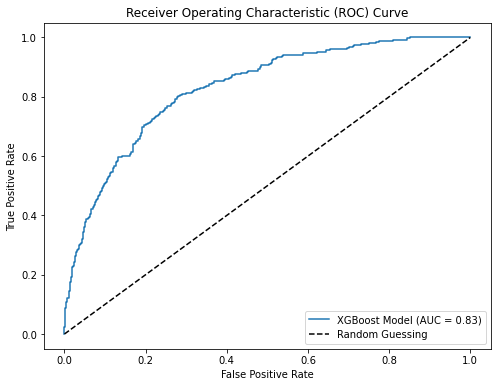

AUC Score: 0.83


In [52]:
# Plot ROC Curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'XGBoost Model (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC Score: {auc:.2f}")

In [53]:
#Downsampling
from sklearn.utils import resample
import pandas as pd

# Assuming 'X_train' is the training features and 'y_train' is the training labels

# Combine X_train and y_train into a single DataFrame for easier manipulation
train_data = pd.concat([X_train, y_train], axis=1)



In [55]:


# Separate majority and minority classes
majority_class = train_data[train_data['match'] == 0]  # Assuming 0 means no match (majority class)
minority_class = train_data[train_data['match'] == 1]  # Assuming 1 means match (minority class)


In [56]:
# Downsample majority class
majority_downsampled = resample(majority_class, 
                                replace=False,    # sample without replacement
                                n_samples=len(minority_class), # match minority class
                                random_state=42)  # for reproducibility



In [57]:
# Combine downsampled majority class with minority class
downsampled_train = pd.concat([majority_downsampled, minority_class])



In [59]:
# Separate features and labels again
X_train_downsampled = downsampled_train.drop('match', axis=1)  # Drop target column to get features
y_train_downsampled = downsampled_train['match']               # Target column only


In [60]:
# Shuffle the downsampled dataset
X_train_downsampled, y_train_downsampled = resample(X_train_downsampled, y_train_downsampled, random_state=42)

print("Downsampled training class distribution:")
print(y_train_downsampled.value_counts())

Downsampled training class distribution:
0    1094
1    1092
Name: match, dtype: int64


In [61]:
#new model
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming X_train_downsampled and y_train_downsampled are the downsampled training data
# and X_test and y_test are the original test set

# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',  # or 'auc' if you want to monitor AUC during training
    use_label_encoder=False,
    random_state=42
)



In [62]:
# Fit the model on downsampled training data
xgb_model.fit(X_train_downsampled, y_train_downsampled)



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [63]:
# Make predictions on the test set
y_pred = xgb_model.predict(X_test)



In [64]:
# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(report)

Accuracy: 0.73
Confusion Matrix:
[[1006  383]
 [  69  218]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.72      0.82      1389
           1       0.36      0.76      0.49       287

    accuracy                           0.73      1676
   macro avg       0.65      0.74      0.65      1676
weighted avg       0.84      0.73      0.76      1676



In [65]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

# Assuming 'X_train' and 'y_train' are the original training data
# 'X_train_downsampled' and 'y_train_downsampled' are the downsampled training data
# 'X_test' and 'y_test' are the test data

# Initialize Logistic Regression model
logreg_original = LogisticRegression(random_state=42, max_iter=1000)
logreg_downsampled = LogisticRegression(random_state=42, max_iter=1000)



In [66]:
# 1. Train the model on original training data
logreg_original.fit(X_train, y_train)
y_pred_original = logreg_original.predict(X_test)



In [67]:
# 2. Train the model on downsampled training data
logreg_downsampled.fit(X_train_downsampled, y_train_downsampled)
y_pred_downsampled = logreg_downsampled.predict(X_test)



In [68]:
# Evaluate both models
print("---- Evaluation of Logistic Regression with Original Training Data ----")
print(f"Accuracy: {accuracy_score(y_test, y_pred_original):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_original))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_original))

print("\n---- Evaluation of Logistic Regression with Downsampled Training Data ----")
print(f"Accuracy: {accuracy_score(y_test, y_pred_downsampled):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_downsampled))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_downsampled))

---- Evaluation of Logistic Regression with Original Training Data ----
Accuracy: 0.85
Confusion Matrix:
[[1342   47]
 [ 208   79]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1389
           1       0.63      0.28      0.38       287

    accuracy                           0.85      1676
   macro avg       0.75      0.62      0.65      1676
weighted avg       0.82      0.85      0.82      1676


---- Evaluation of Logistic Regression with Downsampled Training Data ----
Accuracy: 0.76
Confusion Matrix:
[[1036  353]
 [  51  236]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.75      0.84      1389
           1       0.40      0.82      0.54       287

    accuracy                           0.76      1676
   macro avg       0.68      0.78      0.69      1676
weighted avg       0.86      0.76      0.79      1676



In [69]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for both models on the positive class
y_probs_original = logreg_original.predict_proba(X_test)[:, 1]
y_probs_downsampled = logreg_downsampled.predict_proba(X_test)[:, 1]



In [70]:
# Calculate AUC scores
auc_original = roc_auc_score(y_test, y_probs_original)
auc_downsampled = roc_auc_score(y_test, y_probs_downsampled)



In [71]:
# Generate ROC curve values for both models
fpr_original, tpr_original, _ = roc_curve(y_test, y_probs_original)
fpr_downsampled, tpr_downsampled, _ = roc_curve(y_test, y_probs_downsampled)



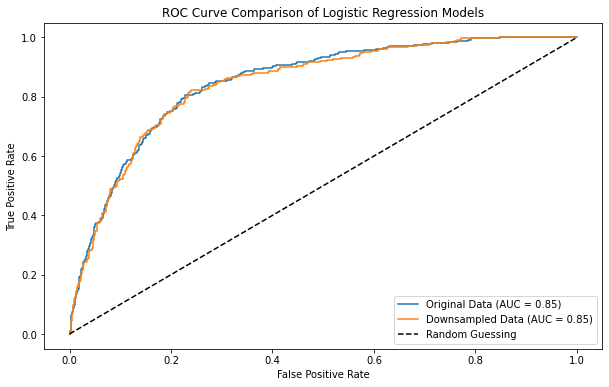

AUC for Original Data: 0.85
AUC for Downsampled Data: 0.85


In [72]:
# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_original, tpr_original, label=f'Original Data (AUC = {auc_original:.2f})')
plt.plot(fpr_downsampled, tpr_downsampled, label=f'Downsampled Data (AUC = {auc_downsampled:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Logistic Regression Models')
plt.legend(loc='lower right')
plt.show()

print(f"AUC for Original Data: {auc_original:.2f}")
print(f"AUC for Downsampled Data: {auc_downsampled:.2f}")

In [ ]:
# Random Forest

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Assuming 'X_train' and 'y_train' are the original training data
# 'X_train_downsampled' and 'y_train_downsampled' are the downsampled training data
# 'X_test' and 'y_test' are the test data

# Initialize two Random Forest models
rf_original = RandomForestClassifier(random_state=42)
rf_downsampled = RandomForestClassifier(random_state=42)



In [74]:
# 1. Train the model on original training data
rf_original.fit(X_train, y_train)
y_pred_original = rf_original.predict(X_test)



In [75]:
# 2. Train the model on downsampled training data
rf_downsampled.fit(X_train_downsampled, y_train_downsampled)
y_pred_downsampled = rf_downsampled.predict(X_test)



In [76]:
# Evaluate both models
print("---- Evaluation of Random Forest with Original Training Data ----")
print(f"Accuracy: {accuracy_score(y_test, y_pred_original):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_original))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_original))

print("\n---- Evaluation of Random Forest with Downsampled Training Data ----")
print(f"Accuracy: {accuracy_score(y_test, y_pred_downsampled):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_downsampled))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_downsampled))

---- Evaluation of Random Forest with Original Training Data ----
Accuracy: 0.85
Confusion Matrix:
[[1345   44]
 [ 206   81]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1389
           1       0.65      0.28      0.39       287

    accuracy                           0.85      1676
   macro avg       0.76      0.63      0.65      1676
weighted avg       0.83      0.85      0.83      1676


---- Evaluation of Random Forest with Downsampled Training Data ----
Accuracy: 0.76
Confusion Matrix:
[[1053  336]
 [  62  225]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.76      0.84      1389
           1       0.40      0.78      0.53       287

    accuracy                           0.76      1676
   macro avg       0.67      0.77      0.69      1676
weighted avg       0.85      0.76      0.79      1676



In [77]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Get predicted probabilities for both models on the positive class
y_probs_original_rf = rf_original.predict_proba(X_test)[:, 1]
y_probs_downsampled_rf = rf_downsampled.predict_proba(X_test)[:, 1]



In [78]:
# Calculate AUC scores
auc_original_rf = roc_auc_score(y_test, y_probs_original_rf)
auc_downsampled_rf = roc_auc_score(y_test, y_probs_downsampled_rf)



In [79]:
# Generate ROC curve values for both models
fpr_original_rf, tpr_original_rf, _ = roc_curve(y_test, y_probs_original_rf)
fpr_downsampled_rf, tpr_downsampled_rf, _ = roc_curve(y_test, y_probs_downsampled_rf)



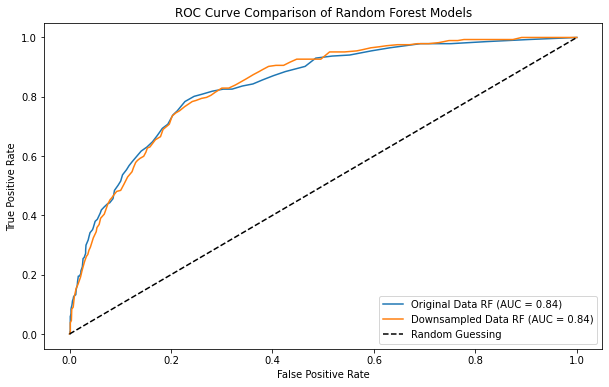

AUC for Random Forest with Original Data: 0.84
AUC for Random Forest with Downsampled Data: 0.84


In [80]:
# Plot ROC Curves
plt.figure(figsize=(10, 6))
plt.plot(fpr_original_rf, tpr_original_rf, label=f'Original Data RF (AUC = {auc_original_rf:.2f})')
plt.plot(fpr_downsampled_rf, tpr_downsampled_rf, label=f'Downsampled Data RF (AUC = {auc_downsampled_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Random Forest Models')
plt.legend(loc='lower right')
plt.show()

print(f"AUC for Random Forest with Original Data: {auc_original_rf:.2f}")
print(f"AUC for Random Forest with Downsampled Data: {auc_downsampled_rf:.2f}")

In [81]:
#Emsemble method
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Original models ensemble
ensemble_original = VotingClassifier(
    estimators=[
        ('xgb_original', xgb_model),
        ('logreg_original', logreg_original),
        ('rf_original', rf_original)
    ],
    voting='soft'  # 'soft' uses predicted probabilities for averaging
)



In [82]:
# Downsampled models ensemble
ensemble_downsampled = VotingClassifier(
    estimators=[
        ('xgb_downsampled', xgb_model),
        ('logreg_downsampled', logreg_downsampled),
        ('rf_downsampled', rf_downsampled)
    ],
    voting='soft'
)



In [83]:
# Train the ensemble models
ensemble_original.fit(X_train, y_train)
ensemble_downsampled.fit(X_train_downsampled, y_train_downsampled)



VotingClassifier(estimators=[('xgb_downsampled',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric='logloss',
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints...
                                            max_delta_step=None, max_depth=None,
                                    

In [84]:
# Predictions for each ensemble
y_pred_ensemble_original = ensemble_original.predict(X_test)
y_pred_ensemble_downsampled = ensemble_downsampled.predict(X_test)



In [85]:
# Evaluation of Original Ensemble
print("---- Evaluation of Ensemble Model with Original Training Data ----")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ensemble_original):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ensemble_original))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ensemble_original))



---- Evaluation of Ensemble Model with Original Training Data ----
Accuracy: 0.85
Confusion Matrix:
[[1334   55]
 [ 198   89]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1389
           1       0.62      0.31      0.41       287

    accuracy                           0.85      1676
   macro avg       0.74      0.64      0.66      1676
weighted avg       0.83      0.85      0.83      1676



In [86]:
# Evaluation of Downsampled Ensemble
print("\n---- Evaluation of Ensemble Model with Downsampled Training Data ----")
print(f"Accuracy: {accuracy_score(y_test, y_pred_ensemble_downsampled):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ensemble_downsampled))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_ensemble_downsampled))


---- Evaluation of Ensemble Model with Downsampled Training Data ----
Accuracy: 0.76
Confusion Matrix:
[[1040  349]
 [  61  226]]

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.75      0.84      1389
           1       0.39      0.79      0.52       287

    accuracy                           0.76      1676
   macro avg       0.67      0.77      0.68      1676
weighted avg       0.85      0.76      0.78      1676



In [87]:
#ensembling the 2 previous models
# Create a new ensemble that combines the previous two ensembles
meta_ensemble = VotingClassifier(
    estimators=[
        ('ensemble_original', ensemble_original),
        ('ensemble_downsampled', ensemble_downsampled)
    ],
    voting='soft'
)



In [88]:
# Train the meta-ensemble model on the original training data
# (Typically, we train on one set, but you can choose either original or downsampled)
meta_ensemble.fit(X_train, y_train)



VotingClassifier(estimators=[('ensemble_original',
                              VotingClassifier(estimators=[('xgb_original',
                                                            XGBClassifier(base_score=None,
                                                                          booster=None,
                                                                          callbacks=None,
                                                                          colsample_bylevel=None,
                                                                          colsample_bynode=None,
                                                                          colsample_bytree=None,
                                                                          device=None,
                                                                          early_stopping_rounds=None,
                                                                          enable_categorical=False,
                       

In [89]:
# Make predictions with the meta-ensemble model
y_pred_meta_ensemble = meta_ensemble.predict(X_test)



In [90]:
# Evaluate the Meta-Ensemble
print("---- Evaluation of Meta-Ensemble Model ----")
print(f"Accuracy: {accuracy_score(y_test, y_pred_meta_ensemble):.2f}")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_meta_ensemble))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_meta_ensemble))

---- Evaluation of Meta-Ensemble Model ----
Accuracy: 0.85
Confusion Matrix:
[[1334   55]
 [ 198   89]]

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1389
           1       0.62      0.31      0.41       287

    accuracy                           0.85      1676
   macro avg       0.74      0.64      0.66      1676
weighted avg       0.83      0.85      0.83      1676



In [ ]:
# Step 3: Calculate AUC
roc_auc = auc(fpr, tpr)


In [ ]:

# Step 4: Plot the ROC Curve
plt.figure()
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print(f"AUC: {roc_auc:.2f}")